In [ ]:
!pip install d2l==1.0.0-beta0

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
def init_cnn(module):
  #Initalize weights for CNN
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

In [15]:
class LeNet(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )


In [16]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [17]:
@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        Y_hat = self(*batch[:-1])
        self.plot('loss', l, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return l

In [18]:
@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

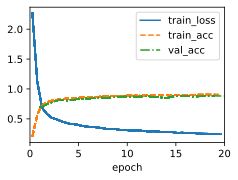

In [19]:
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

In [ ]:
net = MLP(num_outputs=10, num_hiddens=256, num_hiddens_1=128, num_hiddens_2=64, lr=0.1)

In [ ]:
torch.save(net.state_dict(), 'mlp.params')